In [1]:
from smlm_dl import dataset, zernike
from importlib import reload
import skimage
import numpy as np

d:\github\smlm-dl\smlm_dl\dataset.py:423: RuntimeWarning: invalid value encountered in log
  im = axes[1].imshow(np.log(tiled_images))


3:	 [id = 3.000,], [A = 1768.722,], [bg = 29.158,], [x = -3.843,], [y = 9.473,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
8:	 [id = 8.000,], [A = 1837.719,], [bg = 13.940,], [x = -0.314,], [y = 4.239,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
2:	 [id = 2.000,], [A = 1652.672,], [bg = 56.111,], [x = 4.787,], [y = 1.598,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
13:	 [id = 13.000,], [A = 918.035,], [bg = 30.464,], [x = -2.919,], [y = -3.486,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
0:	 [id = 0.000,], [A = 1220.611,], [bg = 25.390,], [x = 2.900,], [y = 6.556,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
5:	 [id = 5.000,], [A = 1041.699,], [bg = 25.917,], [x = 7.094,], [y = -7.469,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
4:	 [id = 4.000,], [A = 1768.682,], [bg = 41.459,], [x = -3.293,], [y = 7.200,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
15:	 [id = 15.000,], [A = 1065.319,], [bg = 24.400,], [x = -2.527,], [y = -5.756,],

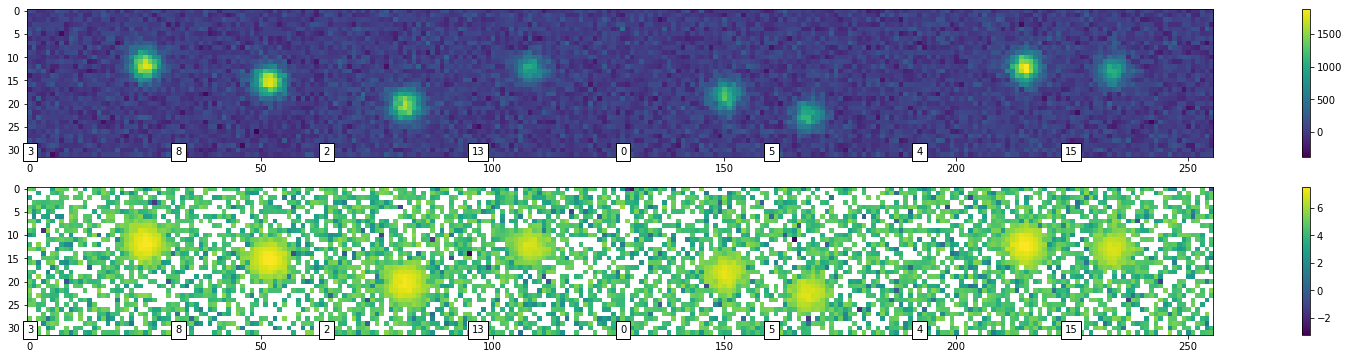

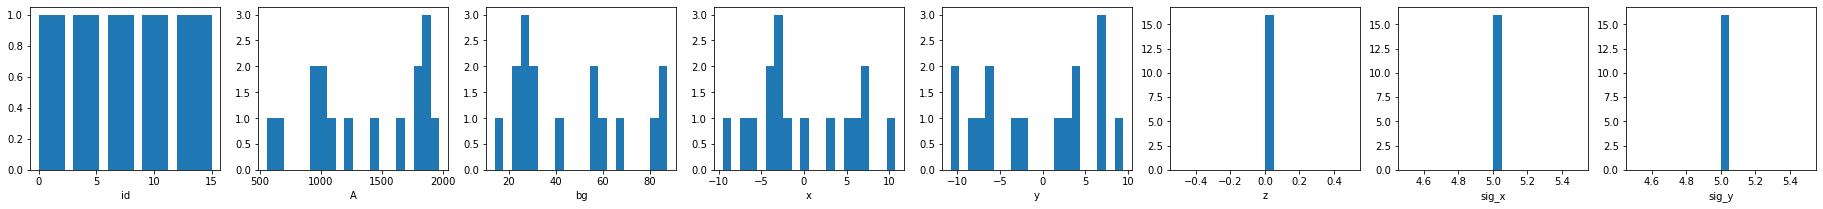

In [2]:
reload(dataset)
a = dataset.Gaussian2DPSFDataset(length=16,)# augmentations={})
dataset.inspect_images(a)

1:	 [id = 1.000,], [A = 905.843,], [bg = 53.130,], [x = -1.856,], [y = -1.189,], [z = 0.000,],
3:	 [id = 3.000,], [A = 1026.356,], [bg = 50.659,], [x = 9.106,], [y = -1.615,], [z = 0.000,],
5:	 [id = 5.000,], [A = 1639.214,], [bg = 91.941,], [x = -1.350,], [y = -2.158,], [z = 0.000,],
6:	 [id = 6.000,], [A = 1592.198,], [bg = 91.118,], [x = -5.716,], [y = -9.308,], [z = 0.000,],
14:	 [id = 14.000,], [A = 808.375,], [bg = 2.217,], [x = -9.877,], [y = 10.762,], [z = 0.000,],
15:	 [id = 15.000,], [A = 1354.342,], [bg = 13.239,], [x = -0.791,], [y = 7.872,], [z = 0.000,],
7:	 [id = 7.000,], [A = 1657.207,], [bg = 87.504,], [x = 10.932,], [y = -8.759,], [z = 0.000,],
0:	 [id = 0.000,], [A = 746.156,], [bg = 34.286,], [x = -7.361,], [y = 8.378,], [z = 0.000,],


d:\github\smlm-dl\smlm_dl\zernike.py:84: UserWarning: Attempting to set identical bottom == top == -0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(-y_lim, y_lim)


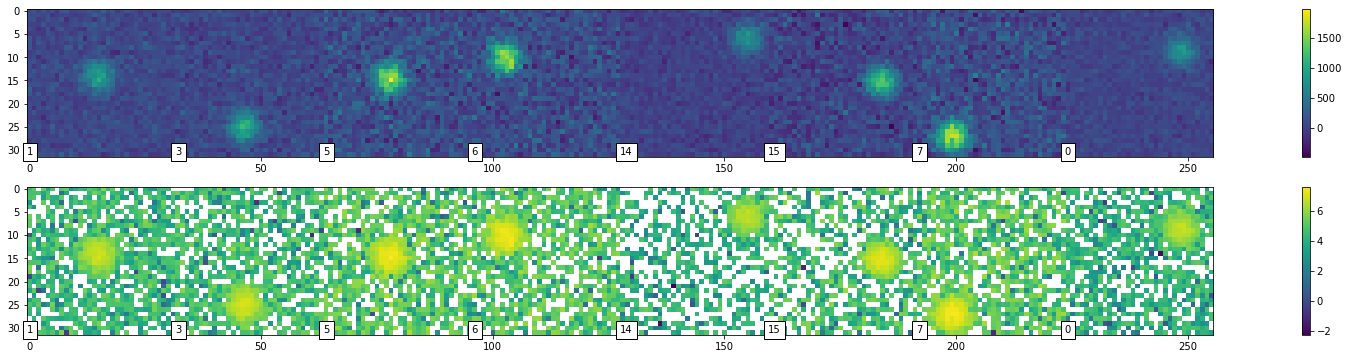

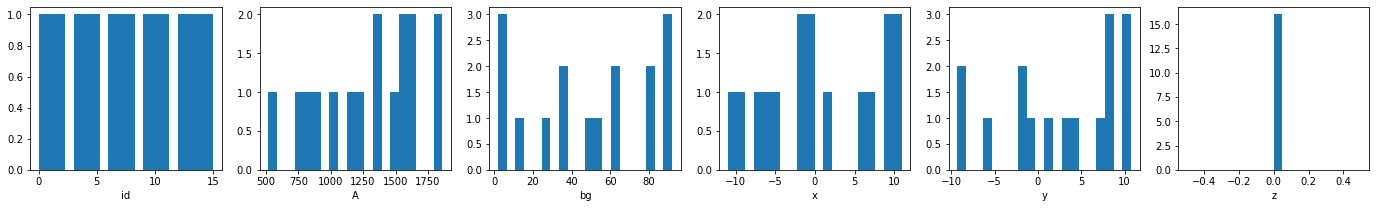

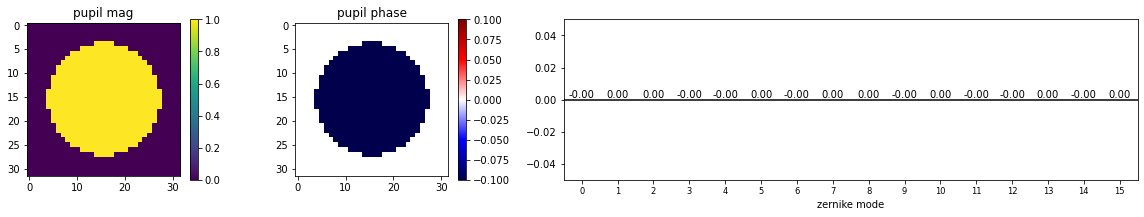

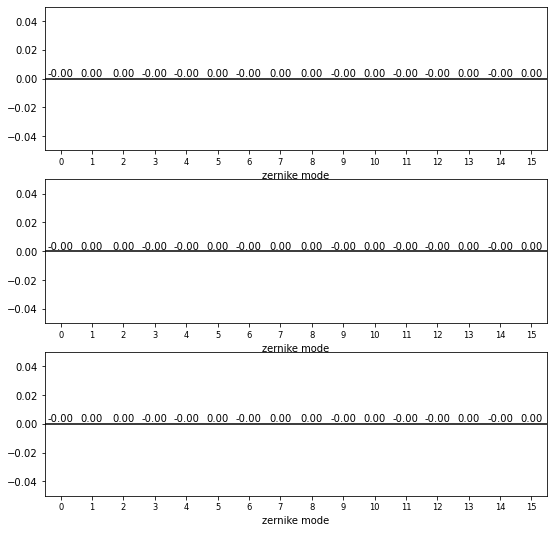

In [3]:
reload(dataset)
reload(zernike)

a = dataset.FourierOpticsPSFDataset(length=16,
                                    out_size=(32,32),
                                    psf_zerns={0:0},#, 1:1, 2:0.2, 4:1, 5:2, 7:-2, 9:3},
                                    noise_params={},
                                    augmentations={dataset.Augmentation.NOISE_GAUSSIAN:0.1},
                                    normalize=False) #psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_images(a)
# print(a.kx)



import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 1, figsize=(9, 9))
zernike.plot_zernike_coeffs(axes[0], zernike.fit_zernike_from_pupil(a.pupil, 16, a.pupil_suppl['radial_distance'], a.pupil_suppl['azimuthal_angle']))

correction = zernike.compensate_tip_tilt(np.angle(a.pupil), np.abs(a.pupil) <=0)
corrected_pupil = np.abs(a.pupil) * np.exp(1j * correction)
zernike.plot_zernike_coeffs(axes[1], zernike.fit_zernike_from_pupil(corrected_pupil, 16, a.pupil_suppl['radial_distance'], a.pupil_suppl['azimuthal_angle']))

correction = zernike.compensate_tip_tilt(np.angle(corrected_pupil), np.abs(corrected_pupil) <=0)
corrected_pupil = np.abs(corrected_pupil) * np.exp(1j * correction)
zernike.plot_zernike_coeffs(axes[2], zernike.fit_zernike_from_pupil(corrected_pupil, 16, a.pupil_suppl['radial_distance'], a.pupil_suppl['azimuthal_angle']))

2:	 [id = 2.000,], [A = 508.633,], [bg = 52.568,], [x = 8.142,], [y = -8.867,], [z = 0.000,],
10:	 [id = 10.000,], [A = 1618.186,], [bg = 87.406,], [x = -3.058,], [y = 1.417,], [z = 0.000,],
4:	 [id = 4.000,], [A = 1031.984,], [bg = 65.783,], [x = -0.256,], [y = -3.357,], [z = 0.000,],
12:	 [id = 12.000,], [A = 1943.183,], [bg = 19.940,], [x = -10.119,], [y = 1.672,], [z = 0.000,],
0:	 [id = 0.000,], [A = 1097.309,], [bg = 30.564,], [x = 9.119,], [y = 6.227,], [z = 0.000,],
8:	 [id = 8.000,], [A = 1539.775,], [bg = 88.620,], [x = -4.400,], [y = 3.328,], [z = 0.000,],
14:	 [id = 14.000,], [A = 1194.044,], [bg = 56.021,], [x = -1.709,], [y = -5.416,], [z = 0.000,],
3:	 [id = 3.000,], [A = 902.124,], [bg = 38.772,], [x = -1.120,], [y = 9.622,], [z = 0.000,],


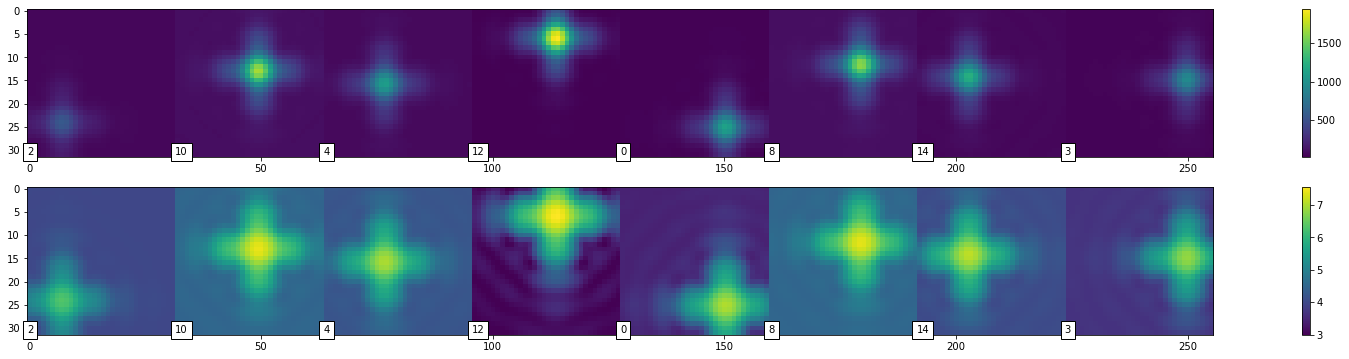

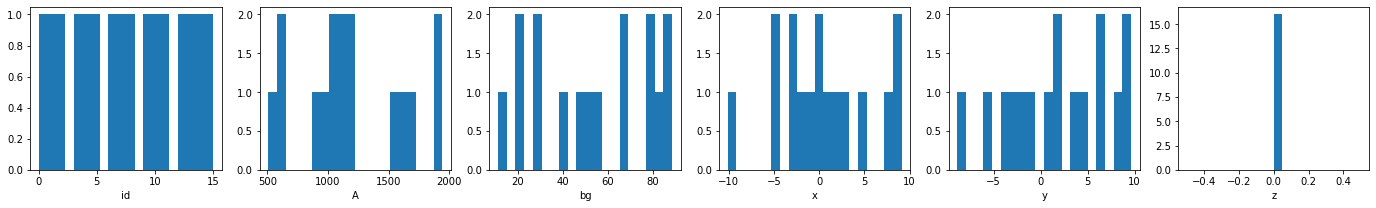

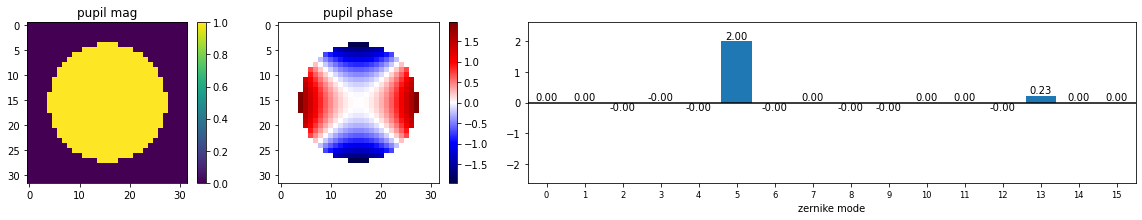

In [4]:
reload(dataset)

a = dataset.FourierOpticsPSFDataset(length=16,
                                      psf_zerns={1:0, 5:2},
                                      noise_params={},
                                      normalize=False,
                                     # psf_params={'pupil_scale':1},
                                     ) #psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_images(a)
# print(a.kx)

0:	 [id = 0.000,], [A = 748.215,], [bg = 96.690,], [x = -1.200,], [y = -3.687,], [z = -4.007,],
2:	 [id = 2.000,], [A = 1425.446,], [bg = 89.209,], [x = 10.521,], [y = 1.871,], [z = -7.170,],
15:	 [id = 15.000,], [A = 1189.385,], [bg = 10.697,], [x = -3.335,], [y = 8.356,], [z = 6.727,],
1:	 [id = 1.000,], [A = 1085.349,], [bg = 77.521,], [x = -9.057,], [y = 5.553,], [z = -6.586,],
14:	 [id = 14.000,], [A = 1836.153,], [bg = 37.266,], [x = -3.458,], [y = -1.094,], [z = 8.603,],
12:	 [id = 12.000,], [A = 1849.468,], [bg = 28.164,], [x = -2.192,], [y = 9.072,], [z = -3.101,],
4:	 [id = 4.000,], [A = 842.669,], [bg = 16.924,], [x = 1.246,], [y = 8.240,], [z = -6.913,],
5:	 [id = 5.000,], [A = 1779.316,], [bg = 79.115,], [x = 9.594,], [y = -7.893,], [z = -8.245,],


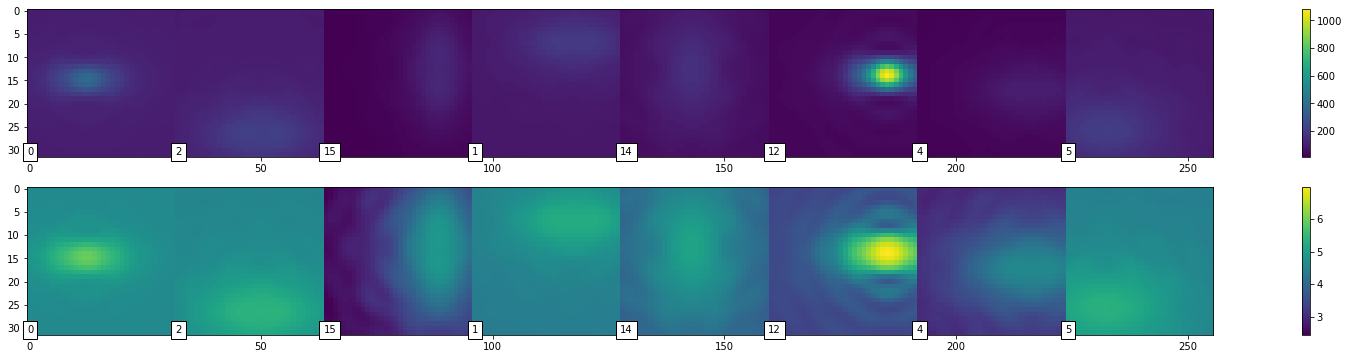

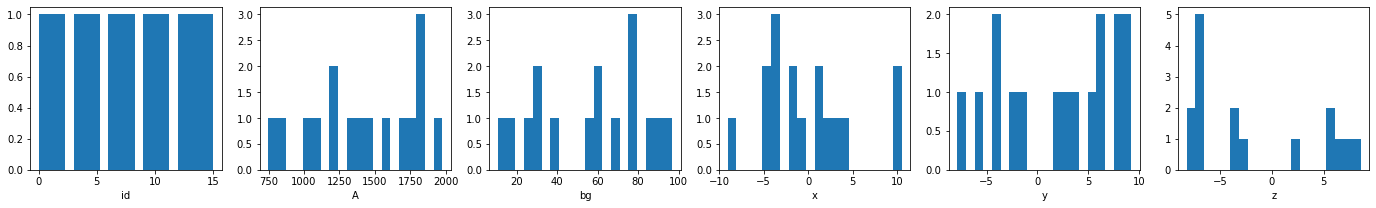

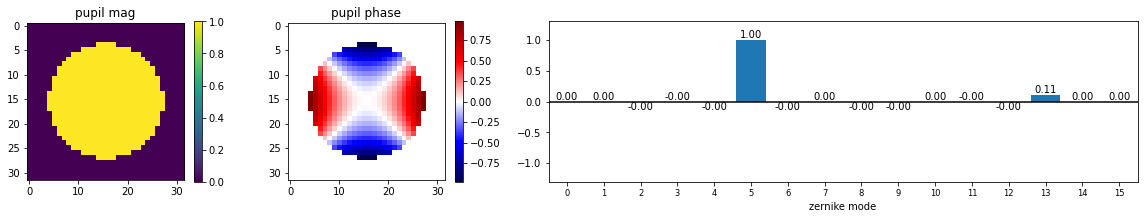

In [5]:
reload(dataset)

a = dataset.FourierOpticsPSFDataset(length=16,
                                    psf_params={'z':[-10,10]},
                                    psf_zerns={1:0, 5:1}, noise_params={}) #psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_images(a)

8:	 [id = 8.000,], [A = 776.259, 1192.909, 1536.532, 901.659, 1293.669, 643.960, 956.091, 570.113,], [bg = 47.512,], [x = -2.754, 4.532, -8.718, 7.118, -4.878, -20.611, 6.947, -9.571,], [y = 5.781, -11.633, 18.573, -15.116, -2.068, 14.420, -16.447, 10.868,], [z = 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,], [sig_x = 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000,], [sig_y = 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000,],
12:	 [id = 12.000,], [A = 1816.701, 1841.560, 1092.482, 1615.883, 603.456, 1643.838, 1174.005, 1080.919,], [bg = 21.961,], [x = -22.222, 13.352, -1.885, 9.972, 6.479, 21.132, 6.735, -0.587,], [y = -14.303, 9.822, -13.553, -19.114, 20.865, 5.245, -9.856, -0.354,], [z = 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,], [sig_x = 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000,], [sig_y = 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000,],
6:	 [id = 6.000,], [A = 542.179, 857.526, 663.714, 1204.654, 721.534, 1793.923, 160

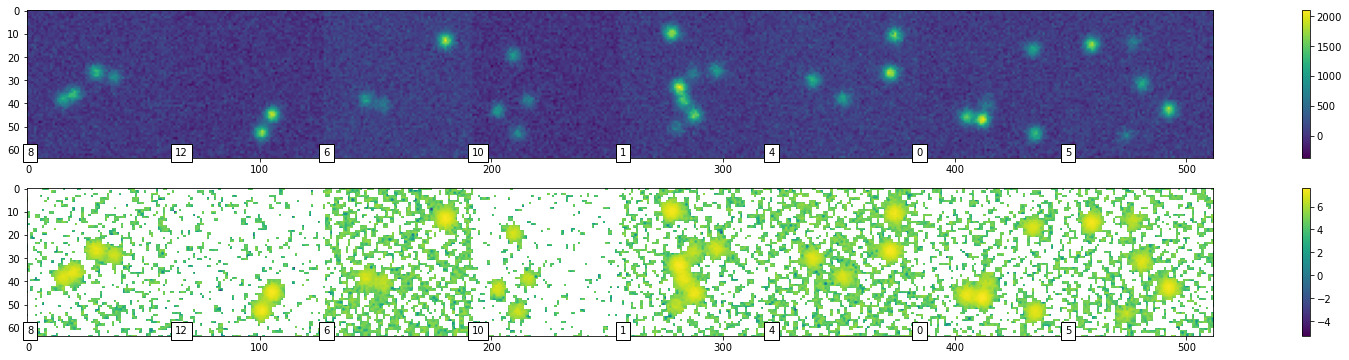

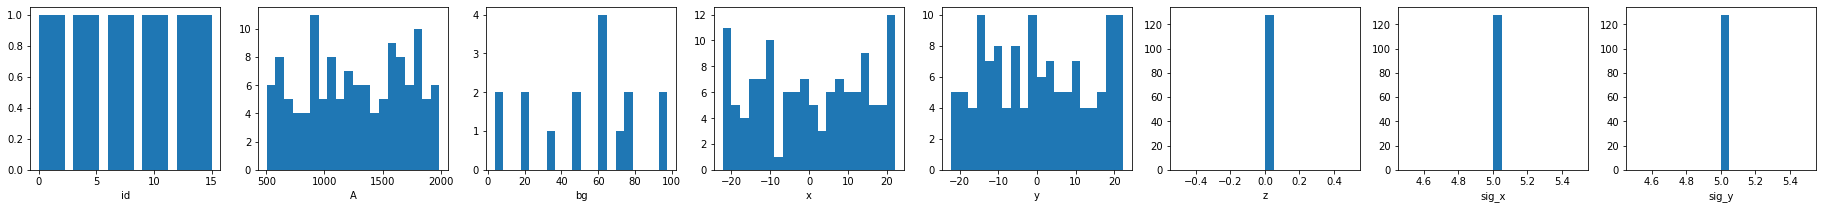

In [6]:
reload(dataset)

a = dataset.Gaussian2DPSFDataset(out_size=(64, 64), length=(16,8), dropout_p=0.5, )
dataset.inspect_images(a)

11:	 [id = 11.000,], [A = 1408.480, 1155.354, 1861.319, 817.537, 1672.835, 680.936, 705.162, 1962.909,], [bg = 23.747,], [x = 13.499, -6.889, -8.789, 8.152, -16.285, 6.673, 6.481, 13.430,], [y = -12.031, 16.605, 6.592, -20.127, -7.507, 15.551, -22.177, 5.470,], [z = -0.315, -8.471, 7.112, 2.921, 7.129, -9.327, -6.935, -8.154,],
2:	 [id = 2.000,], [A = 1203.426, 1544.579, 739.553, 1746.212, 1159.089, 783.056, 777.920, 1325.104,], [bg = 5.083,], [x = 15.251, 16.833, -9.339, -14.469, 1.149, 1.077, -10.562, -15.901,], [y = -1.984, 12.628, -6.885, 19.260, -16.335, -13.542, -21.604, 22.259,], [z = -9.350, 5.151, 3.322, -4.467, -1.120, -5.374, -0.636, -3.617,],
13:	 [id = 13.000,], [A = 680.163, 743.245, 952.627, 1424.834, 552.979, 718.849, 1056.377, 1200.220,], [bg = 18.888,], [x = -19.047, 7.412, -5.501, 12.668, 10.209, 8.068, -3.164, 10.563,], [y = 3.280, -6.534, -14.522, 7.106, 16.646, -3.712, 12.892, 9.695,], [z = 8.418, 9.355, 6.127, 7.970, 4.727, 2.467, -4.560, -2.067,],
12:	 [id = 12.

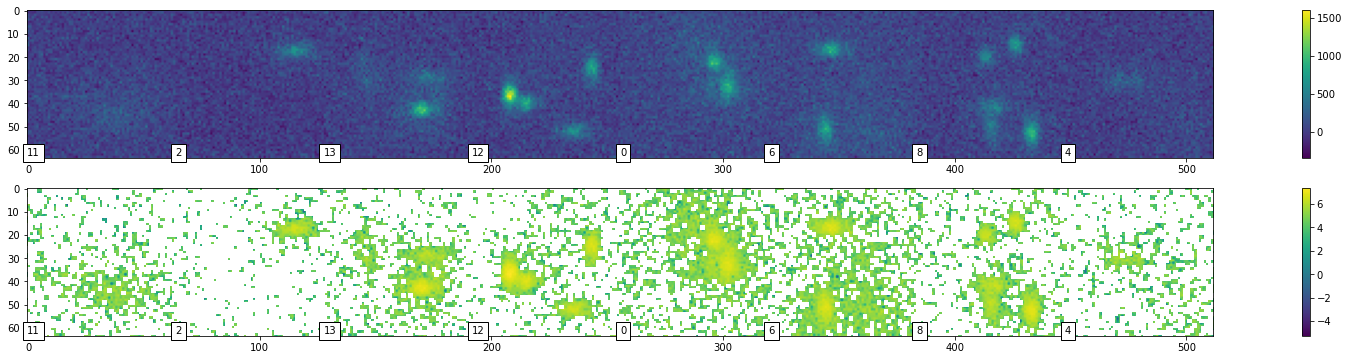

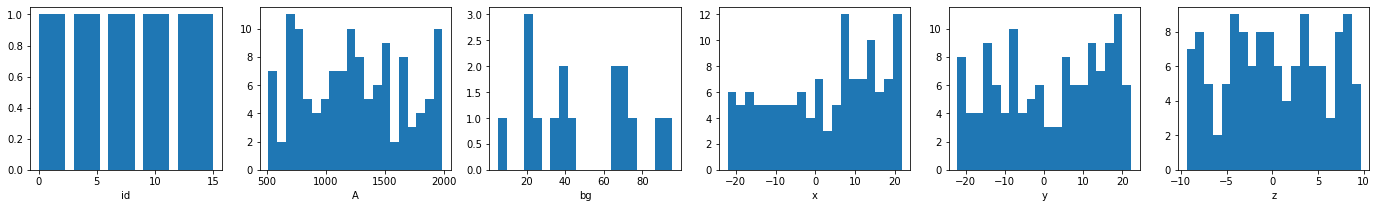

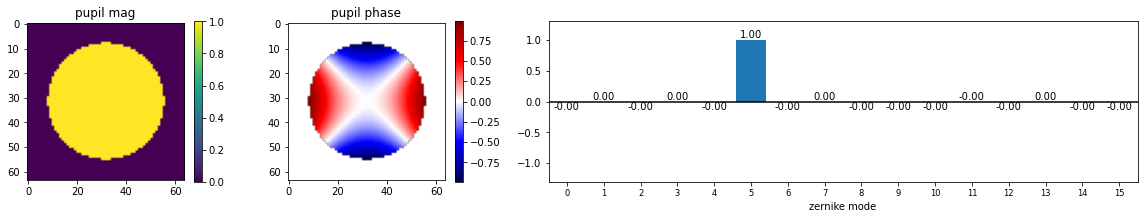

In [7]:
reload(dataset)

a = dataset.FourierOpticsPSFDataset(out_size=(64, 64), length=(16,8),
                                    psf_params={'z':[-10,10]},
                                    dropout_p=0.5, psf_zerns={1:0, 5:1}, ) #psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_images(a)
print(a.params.keys())
for key, val in a.params.items():
    print(val.shape)

[-31.5 -30.5 -29.5 -28.5 -27.5 -26.5 -25.5 -24.5 -23.5 -22.5 -21.5 -20.5
 -19.5 -18.5 -17.5 -16.5 -15.5 -14.5 -13.5 -12.5 -11.5 -10.5  -9.5  -8.5
  -7.5  -6.5  -5.5  -4.5  -3.5  -2.5  -1.5  -0.5   0.5   1.5   2.5   3.5
   4.5   5.5   6.5   7.5   8.5   9.5  10.5  11.5  12.5  13.5  14.5  15.5
  16.5  17.5  18.5  19.5  20.5  21.5  22.5  23.5  24.5  25.5  26.5  27.5
  28.5  29.5  30.5  31.5]
61:	 [id = 61.000,], [A = 1.000,], [bg = 0.000,], [x = 0.000,], [y = 0.000,], [z = 29.500,],
46:	 [id = 46.000,], [A = 1.000,], [bg = 0.000,], [x = 0.000,], [y = 0.000,], [z = 14.500,],
14:	 [id = 14.000,], [A = 1.000,], [bg = 0.000,], [x = 0.000,], [y = 0.000,], [z = -17.500,],
2:	 [id = 2.000,], [A = 1.000,], [bg = 0.000,], [x = 0.000,], [y = 0.000,], [z = -29.500,],
13:	 [id = 13.000,], [A = 1.000,], [bg = 0.000,], [x = 0.000,], [y = 0.000,], [z = -18.500,],
37:	 [id = 37.000,], [A = 1.000,], [bg = 0.000,], [x = 0.000,], [y = 0.000,], [z = 5.500,],
4:	 [id = 4.000,], [A = 1.000,], [bg = 0.000,], [x 

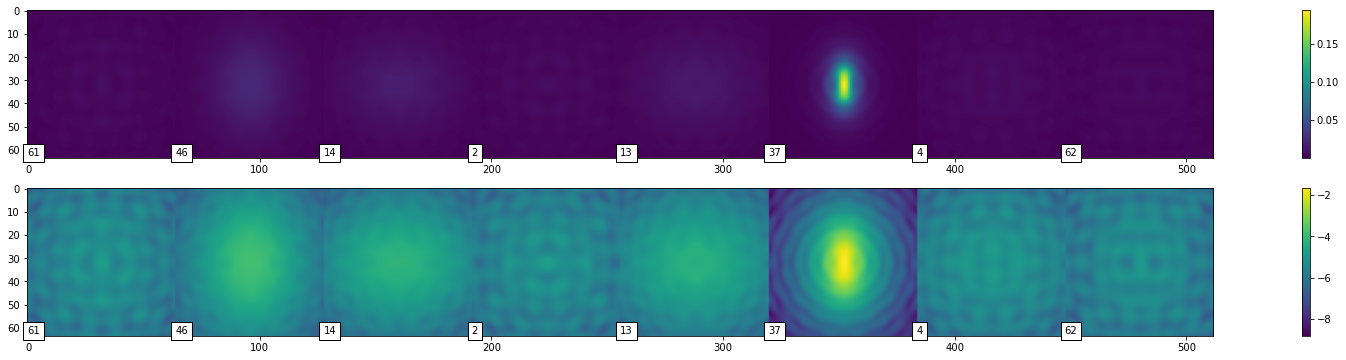

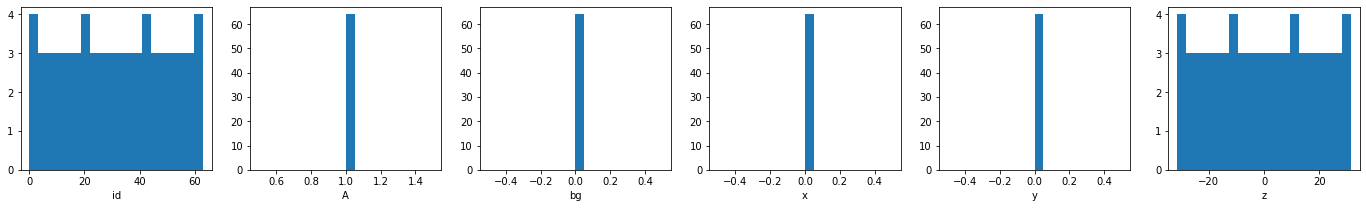

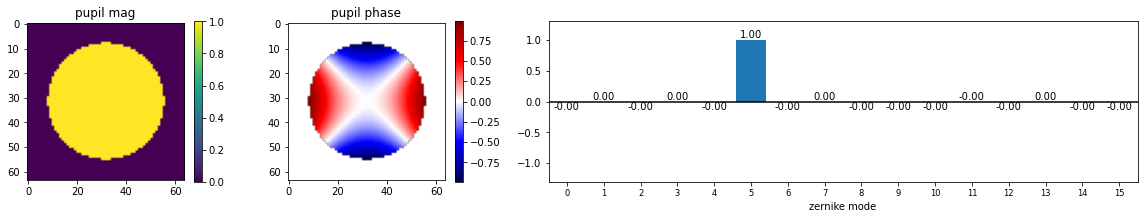

In [8]:
reload(dataset)

length = 64
image_params_preset = {'A': np.ones(length),
                       'x': np.zeros(length),
                       'y': np.zeros(length),
                       'bg': np.zeros(length),
                       'z': np.linspace(-31.5, 31.5, length)}
print(image_params_preset['z'])

a = dataset.FourierOpticsPSFDataset(out_size=(64, 64), length=(length,1),
                                    # psf_params={'z':[-10,10]},
                                    dropout_p=0, psf_zerns={1:0, 5:1},
                                    image_params_preset=image_params_preset,
                                    noise_params ={}
                                   ) #psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_images(a)
print(a.params.keys())

4:	 [id = 4.000,], [A = 1.703,], [bg = 6.654,], [x = -4.286,], [y = -6.224,], [z = 0.000,],
5:	 [id = 5.000,], [A = 1.735,], [bg = 5.660,], [x = -4.017,], [y = -1.866,], [z = 0.000,],
2:	 [id = 2.000,], [A = 0.961,], [bg = 5.059,], [x = 4.851,], [y = -2.446,], [z = 0.000,],
7:	 [id = 7.000,], [A = 1.335,], [bg = 7.955,], [x = 2.898,], [y = 3.825,], [z = 0.000,],
6:	 [id = 6.000,], [A = 1.054,], [bg = 7.783,], [x = -0.471,], [y = 4.055,], [z = 0.000,],
0:	 [id = 0.000,], [A = 0.844,], [bg = 1.275,], [x = 2.224,], [y = -0.156,], [z = 0.000,],
1:	 [id = 1.000,], [A = 0.758,], [bg = 3.738,], [x = -3.656,], [y = 9.320,], [z = 0.000,],
3:	 [id = 3.000,], [A = 0.884,], [bg = 3.690,], [x = -3.186,], [y = 3.069,], [z = 0.000,],


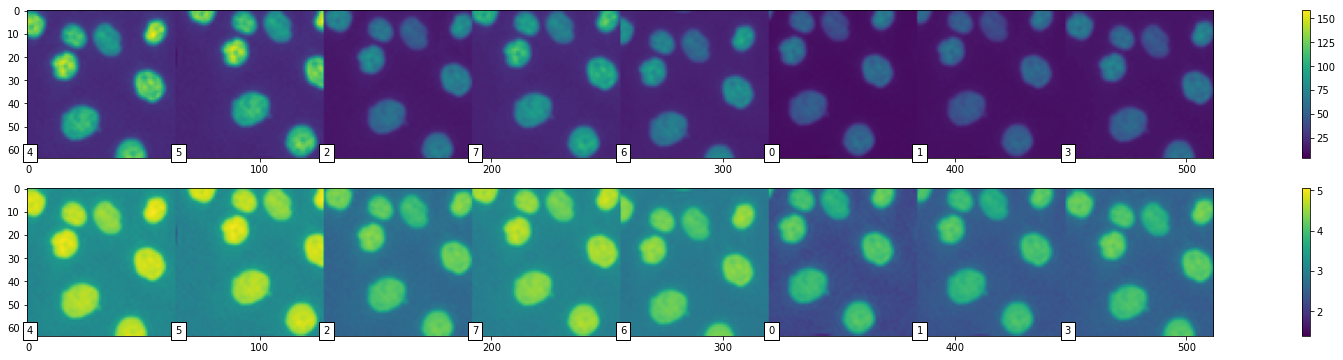

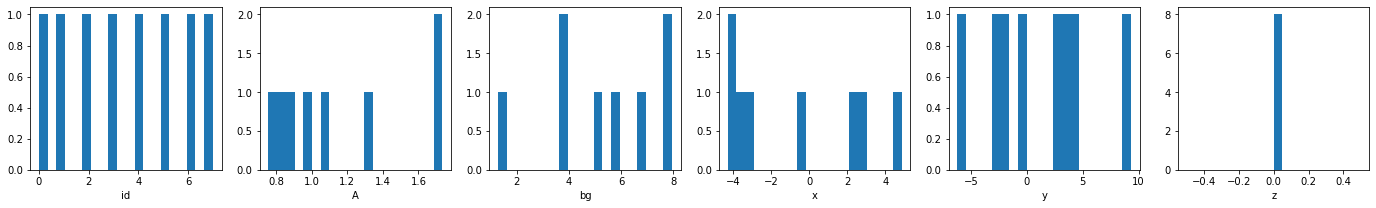

In [9]:
reload(dataset)

a = dataset.SingleImageDataset(skimage.data.human_mitosis()[20:, 20:], out_size=(64,64), length=8,
                               image_params={'x':[-5, +5],
                                             'y':[-10, +10],
                                           # 'conv':np.ones((3,3)),
                                          },
                               noise_params={}, augmentations={}, normalize=False)
dataset.inspect_images(a)